In [1]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import matplotlib.pyplot as plt
from fastprogress import master_bar, progress_bar
%matplotlib inline

In [2]:
import torch
from torch import nn
from torch.autograd import Variable
import numpy as np
# import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'IPAPGothic'
# %matplotlib inline

torch.manual_seed(1)    # reproducible
# from fastprogress import master_bar, progress_bar

In [3]:
import codecs
import glob
import MeCab
import pandas as pd

In [4]:
tagger = MeCab.Tagger("-Ochasen")

In [5]:
def get_morphemes(fpath):
    """ Get morphemes
    :param fpath: file path
    :return: result of morphological analysis, -1 indicates error
    """
    data = read_file(fpath)
    morphemes = tokenzier(data.encode('utf-16', 'surrogatepass').decode('utf-16'))
    return morphemes if morphemes else -1

def read_file(fpath):
    """ Read file
    :param fpath: file path
    :return: file content of live door news corpus
    """
    with codecs.open(fpath, 'r', 'utf-8') as f:
        return "\n".join(f.read().splitlines()[2:])

def tokenzier(sentences):
    """ Morphological analysis
    :param sentences: strings in the article
    :return: morphemes
    """
    tag = tagger.parseToNode(sentences)
    morphemes = []
    while tag:
        features = tag.feature.split(",")
        if features[0] == "名詞":
            morphemes.append(tag.surface.lower())
        tag = tag.next
    return morphemes

In [6]:
path = "text/"
ldcc = ["dokujo-tsushin","it-life-hack","kaden-channel","livedoor-homme",
        "movie-enter","peachy","smax","sports-watch","topic-news"]
ldcc2id = {v: k for k, v in enumerate(ldcc)}

In [7]:
df = pd.DataFrame(columns=["class", "news"])
df.head()

,class,news


In [8]:
for d, i in ldcc2id.items():
    flist = glob.glob(path + d + "/*.txt")
    flist.remove(path + d + "/LICENSE.txt")
    for fpath in flist:
        morphemes = get_morphemes(fpath)
        if morphemes == -1:
            continue
        temp = pd.Series([i, " ".join(morphemes)], index=df.columns)
        df = df.append(temp, ignore_index=True)
print('done')

done


In [9]:
len(df)

7367

In [10]:
df.shape

(7367, 2)

In [11]:
df.head()

,class,news
0,0,タニタに続き、第二弾！ 話題の社員食堂は家庭薬膳\nタニタだけじゃない。2008年から社員食...
1,0,マスクで顔を隠す独女たち\n東京・渋谷のセンター街でマスク姿の10〜30代の男女100人にア...
2,0,薄っぺらい親友関係が増殖中？ 女の友情はきょわい〜！？\nあなたは親友と呼べる友達がいるだろ...
3,0,オトナ女子映画部】“隙だらけ”のウザい女に学ぶ男心のつかみ方『乱暴と待機』\n互いに好意を持...
4,0,女医が教えるオンナの体のウソホント vol.10「体の変化とホルモン分泌の周期」presen...


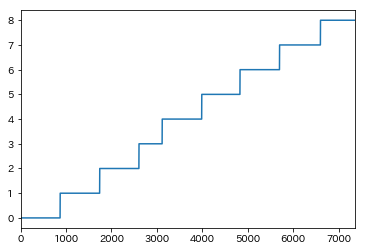

In [13]:
df['class'].plot()

In [14]:
df.to_pickle('news.pkl')